In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (20, 6) #Estas dos lineas me ayudan a controlar el tamaño de los plots en el notebook

In [3]:
data = pd.read_csv('data/aeropuertos.csv')

In [4]:
data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54736 entries, 0 to 54735
Data columns (total 12 columns):
ident           54736 non-null object
type            54736 non-null object
name            54736 non-null object
elevation_ft    47785 non-null float64
continent       27259 non-null object
iso_country     54489 non-null object
iso_region      54736 non-null object
municipality    49120 non-null object
gps_code        41072 non-null object
iata_code       9171 non-null object
local_code      28591 non-null object
coordinates     54736 non-null object
dtypes: float64(1), object(11)
memory usage: 5.0+ MB


In [6]:
data.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

In [7]:
null_data = data[data.isnull().any(axis = 1)]
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54062 entries, 0 to 54735
Data columns (total 12 columns):
ident           54062 non-null object
type            54062 non-null object
name            54062 non-null object
elevation_ft    47111 non-null float64
continent       26585 non-null object
iso_country     53815 non-null object
iso_region      54062 non-null object
municipality    48446 non-null object
gps_code        40398 non-null object
iata_code       8497 non-null object
local_code      27917 non-null object
coordinates     54062 non-null object
dtypes: float64(1), object(11)
memory usage: 5.4+ MB


In [8]:
null_data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [9]:
data.isnull().sum(axis = 0)

ident               0
type                0
name                0
elevation_ft     6951
continent       27477
iso_country       247
iso_region          0
municipality     5616
gps_code        13664
iata_code       45565
local_code      26145
coordinates         0
dtype: int64

In [10]:
data.drop(columns = ['continent','iata_code','local_code','gps_code','elevation_ft'],axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54736 entries, 0 to 54735
Data columns (total 7 columns):
ident           54736 non-null object
type            54736 non-null object
name            54736 non-null object
iso_country     54489 non-null object
iso_region      54736 non-null object
municipality    49120 non-null object
coordinates     54736 non-null object
dtypes: object(7)
memory usage: 2.9+ MB


In [12]:
del_iso_country_index = data[data.iso_country.isna()].index

In [13]:
data.drop(index = del_iso_country_index, inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54489 entries, 0 to 54735
Data columns (total 7 columns):
ident           54489 non-null object
type            54489 non-null object
name            54489 non-null object
iso_country     54489 non-null object
iso_region      54489 non-null object
municipality    48975 non-null object
coordinates     54489 non-null object
dtypes: object(7)
memory usage: 3.3+ MB


In [15]:
del_municipality_index = data[data.municipality.isnull()].index

In [16]:
data.drop(index = del_municipality_index, inplace = True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48975 entries, 0 to 54735
Data columns (total 7 columns):
ident           48975 non-null object
type            48975 non-null object
name            48975 non-null object
iso_country     48975 non-null object
iso_region      48975 non-null object
municipality    48975 non-null object
coordinates     48975 non-null object
dtypes: object(7)
memory usage: 3.0+ MB


In [18]:
print('Existen {} tipos de aeropuertos. \nSon: {} '.format(data.type.nunique(),data.type.unique()))

Existen 7 tipos de aeropuertos. 
Son: ['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport'] 


Por curiosidad, ¿Qué aeropuertos se han cerrado en Colombia?

In [19]:
data[data['type'].isin(['closed']) & data['iso_country'].isin(['CO'])]

,ident,type,name,iso_country,iso_region,municipality,coordinates
43952,SK-204,closed,Planeta Rica Airport,CO,CO-COR,Planeta Rica,"-75.577379, 8.398853"
44350,SKOT,closed,Otu Airport,CO,CO-ANT,Remedios,"-74.7155, 7.01037"
44370,SKSF,closed,Santa Fé de Antioquía Airport,CO,CO-ANT,Santa Fé de Antioquía,"-75.822521, 6.500631"


In [20]:
del_type = data[data['type'].isin(['heliport','closed','seaplane_base','balloonport'])].index

In [21]:
data.drop(index = del_type, inplace = True)

In [22]:
data['type'].value_counts()

small_airport     29999
medium_airport     4030
large_airport       582
Name: type, dtype: int64

In [23]:
colombian_small =  data.type[data['type'].isin(['small_airport']) & data['iso_country'].isin(['CO'])].count()
colombian_medium = data.type[data['type'].isin(['medium_airport']) & data['iso_country'].isin(['CO'])].count()
colombian_big =    data.type[data['type'].isin(['large_airport']) & data['iso_country'].isin(['CO'])].count()
print('En Colombia existen:\nAeropuertos pequeños: {}\nAeropuertos medianos: {}\nAeropuertos grandes: {}'.format
     (colombian_small,colombian_medium,colombian_big))

En Colombia existen:
Aeropuertos pequeños: 589
Aeropuertos medianos: 59
Aeropuertos grandes: 1


In [24]:
aero_colombia = data[data['iso_country'].isin(['CO'])]

In [25]:
aero_colombia.reset_index(inplace = True, drop = True)

In [26]:
aero_colombia.head()

,ident,type,name,iso_country,iso_region,municipality,coordinates
0,AGI,small_airport,El Paraíso Airport,CO,CO-CES,Aguachica,"-73.584722, 8.128611"
1,CO-0054,small_airport,Ríohacha Highway Strip,CO,CO-GUV,Ríohacha,"-72.9892, 11.4988"
2,CO-0055,small_airport,Mondo Nuevo Airport,CO,CO-COR,Mondo Nuevo,"-75.7911, 8.3909"
3,CO-0056,small_airport,Patetal Airport,CO,CO-COR,Ayapel,"-75.058043, 8.231858"
4,CO-0057,small_airport,Taraira Airstrip,CO,CO-VAU,Taraira,"-69.638809, -0.56784"


In [27]:
cuenta_aero_co = aero_colombia.groupby('type')[['type']].count()

In [28]:
cuenta_aero_co.columns = ['Number']

In [29]:
cuenta_aero_co

,Number
type,
large_airport,1
medium_airport,59
small_airport,589


In [30]:
aero_colombia.head()

,ident,type,name,iso_country,iso_region,municipality,coordinates
0,AGI,small_airport,El Paraíso Airport,CO,CO-CES,Aguachica,"-73.584722, 8.128611"
1,CO-0054,small_airport,Ríohacha Highway Strip,CO,CO-GUV,Ríohacha,"-72.9892, 11.4988"
2,CO-0055,small_airport,Mondo Nuevo Airport,CO,CO-COR,Mondo Nuevo,"-75.7911, 8.3909"
3,CO-0056,small_airport,Patetal Airport,CO,CO-COR,Ayapel,"-75.058043, 8.231858"
4,CO-0057,small_airport,Taraira Airstrip,CO,CO-VAU,Taraira,"-69.638809, -0.56784"


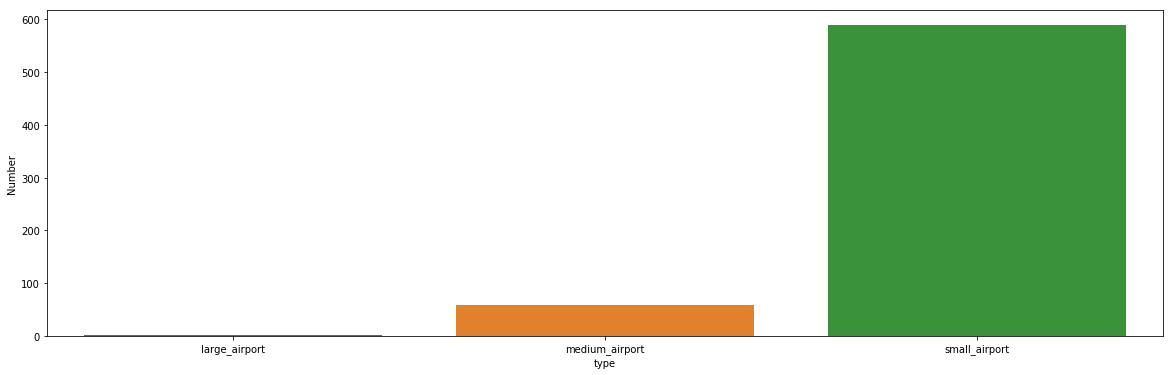

In [31]:
sns.barplot(data = cuenta_aero_co, x = cuenta_aero_co.index, y = 'Number')

In [68]:
data_grafica = data.loc[:,'type':'iso_country']
data_grafica = data.groupby('iso_country')[['type']].count().sort_values(by = 'type', ascending = False)
data_grafica.columns = ['numero']
data_grafica = data_grafica[:15]

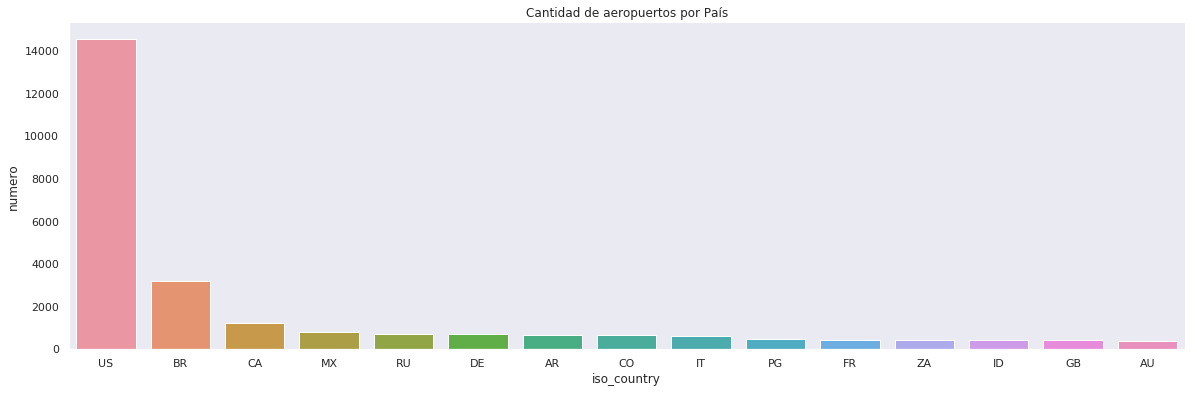

In [70]:
sns.barplot(data = data_grafica, x = data_grafica.index, y = data_grafica.numero)
sns.set_style("dark")
sns.despine() # Sin bordes en la gráfica
plt.title('Cantidad de aeropuertos por País')
plt.show()

In [34]:
iso_list = data.iso_country.unique()
iso_list

array(['US', 'PR', 'MH', 'SO', 'AQ', 'PG', 'SD', 'SA', 'AE', 'AF', 'SB',
       'CO', 'AU', 'CN', 'MG', 'TD', 'AL', 'AM', 'MX', 'MZ', 'PW', 'NR',
       'AO', 'AR', 'AS', 'GA', 'AZ', 'BA', 'BE', 'BF', 'BG', 'GL', 'BI',
       'IS', 'BJ', 'OM', 'XK', 'BO', 'BR', 'BS', 'CV', 'BW', 'BY', 'LR',
       'BZ', 'CA', 'GB', 'CD', 'CF', 'CG', 'PH', 'MR', 'CH', 'CL', 'CM',
       'CR', 'CU', 'CY', 'CZ', 'PA', 'DZ', 'DE', 'ID', 'GH', 'CI', 'DK',
       'NG', 'RU', 'NE', 'TN', 'TG', 'EC', 'EE', 'FI', 'EG', 'GG', 'JE',
       'IM', 'FK', 'EH', 'NL', 'IE', 'FO', 'LU', 'NO', 'PL', 'PT', 'MN',
       'ES', 'SE', 'ET', 'LV', 'LT', 'ZA', 'SZ', 'GQ', 'SH', 'MU', 'FJ',
       'IO', 'ZM', 'FM', 'KM', 'YT', 'RE', 'ST', 'FR', 'TF', 'SC', 'ZW',
       'MW', 'LS', 'ML', 'GM', 'GE', 'GF', 'SL', 'GW', 'MA', 'GN', 'SN',
       'GR', 'GT', 'TZ', 'GY', 'SR', 'DJ', 'ER', 'KE', 'LY', 'HN', 'VN',
       'KZ', 'RW', 'SS', 'HT', 'HU', 'UG', 'TL', 'IN', 'IQ', 'IR', 'JP',
       'IT', 'JM', 'KG', 'KP', 'KR', 'MY', 'HR', 'P

In [35]:
type_list = data.type.unique()
type_list

array(['small_airport', 'medium_airport', 'large_airport'], dtype=object)

In [74]:
agrupados = data.groupby(['iso_country','type']).size()
agrupados.US

type
large_airport       169
medium_airport      688
small_airport     13732
dtype: int64

In [37]:
agrupados_df = pd.DataFrame(agrupados)
agrupados_df.reset_index(inplace = True)

In [38]:
agrupados_df.columns = ['iso_country','type','numero']

In [39]:
agrupados_df.sort_values(['numero','type'], ascending = [False,False],inplace = True)

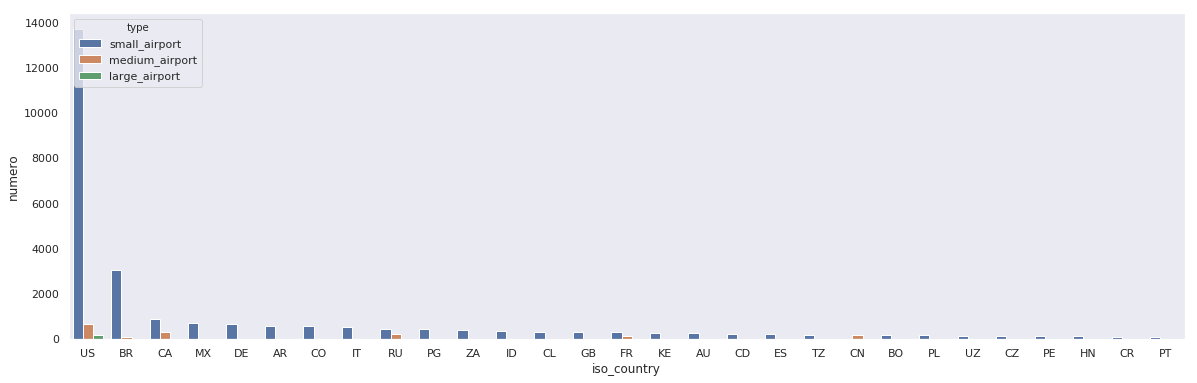

In [71]:
sns.barplot(data = agrupados_df[0:35], x = 'iso_country', y = 'numero', hue = 'type' )

In [41]:
small_airports = agrupados_df[agrupados_df['type'] == 'small_airport']
medium_airports = agrupados_df[agrupados_df['type'] == 'medium_airport']
large_airports = agrupados_df[agrupados_df['type'] == 'large_airport']

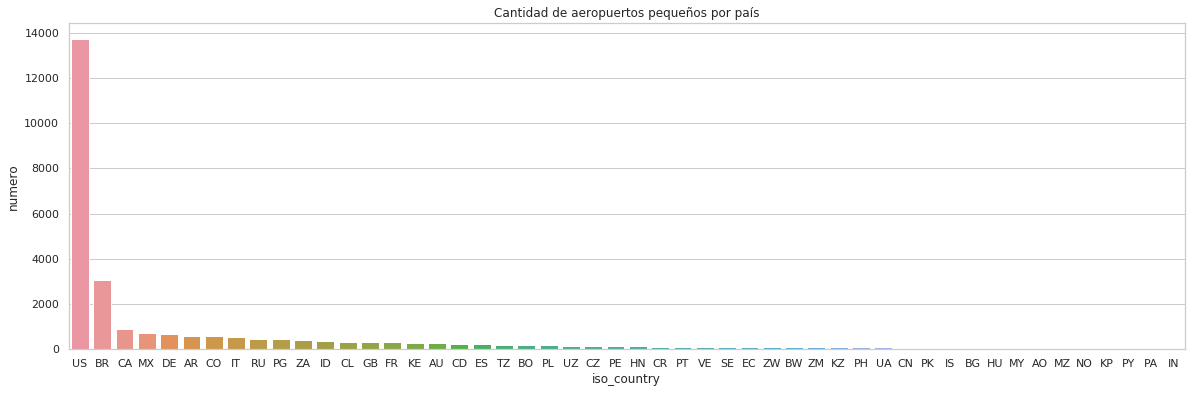

In [81]:
sns.barplot(data = small_airports[:50], x = 'iso_country', y = 'numero')
plt.title('Cantidad de aeropuertos pequeños por país')
sns.set_style("whitegrid")

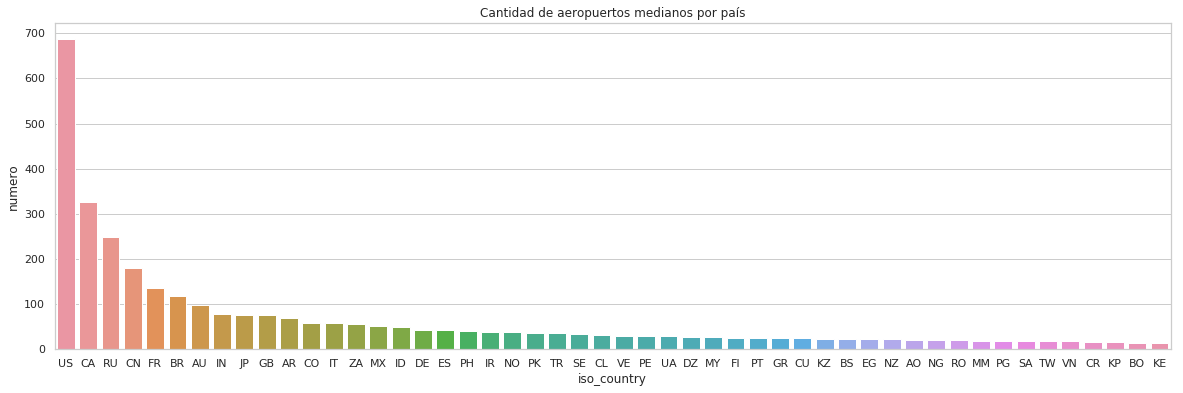

In [80]:
sns.barplot(data = medium_airports[:50], x = 'iso_country', y = 'numero')
plt.title('Cantidad de aeropuertos medianos por país')
sns.set_style("whitegrid")

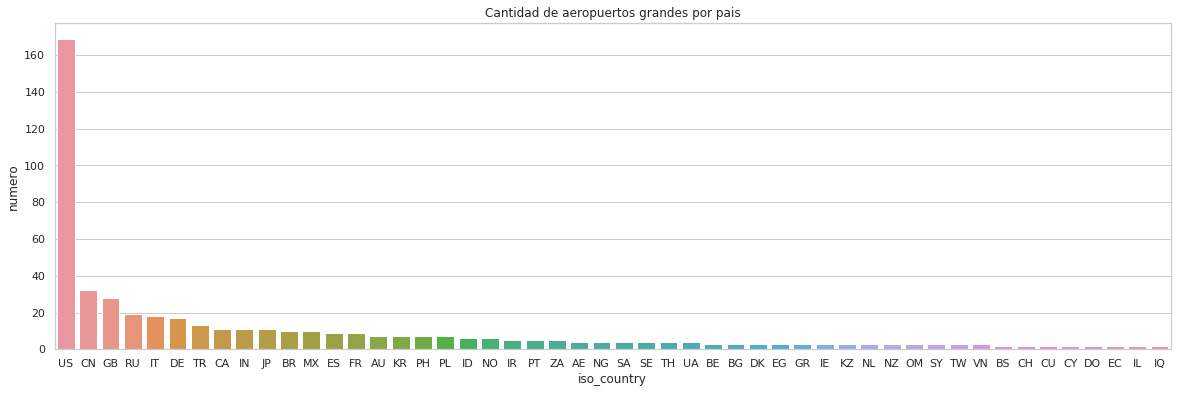

In [79]:
sns.barplot(data = large_airports[:50], x = 'iso_country', y = 'numero')
plt.title('Cantidad de aeropuertos grandes por pais')
sns.set_style("whitegrid")

**Conclusiones**
* Podemos apreciar que en Colombia se han cerrado tres aeropuertos (Planeta Rico, Otu Airport, Santa Fé de Antioquía)
* En Colombia existen 649 aeropuertos de los cuales : 589 son pequeños, 59 son de tamaño y sólo uno es de gran tamaño (Aeropuerto Internacional El Dorado)
* El país con más aeropuertos del mundo es Estados Unidos con un total de 14589 de los cuales: 13732 son pequeños, 688 son medianos y 169 son grandes.